In [38]:
import numpy as np

In [39]:
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
from functools import partial

def grad_batch(f, batch_size):
    def grad_help(*args):
        h = 1e-5
        dim = len(args)
        batch = set(np.random.choice(np.arange(dim), batch_size, replace=False))
        return [0 if i not in batch else
                (f(*[args[j] + (h if j == i else 0) for j in range(dim)])
                - f(*[args[j] - (h if j == i else 0) for j in range(dim)]))
                /(2*h)
                for i in range(dim)]
    return grad_help

def sgd_general(batch_size, f, lr0, d, epoch, x):
    points = np.zeros((epoch, 2))
    points[0] = x
    for i in range(1, epoch):
        x = x - lr0*np.exp(-d*i) * np.array(grad_batch(f, batch_size)(*x))
        points[i] = x
    return points

sgd = partial(sgd_general, 1)
gd = lambda f, lr0, d, epoch, x: sgd_general( f, lr0, d, epoch, x)


def regression(x, y):
    if x.ndim == 1:
        x_mat = np.array([np.full(len(x), 1), x]).T
        k = 2
    else:
        x_mat = np.insert(x, 0, 1, axis=1)
        k = len(np.array(x[0])) + 1
    f = lambda *b: np.linalg.norm((y - x_mat.dot(np.array(b)))**2)
    bs = sgd(f, 0.01, 0.01, 100, np.full(k, 1))
    ax = plt.figure().add_subplot()
    X = np.arange(len(bs))
    ax.plot(X, np.vectorize(f)(*bs.T))
    ax.grid()
    if x.ndim == 1:
        draw_2d(x, y, bs[-1])
    return bs[-1]

def draw_2d(x, y, bs):
    points = np.concatenate([x,y]).reshape((2,len(x)))
    ax = plt.figure().add_subplot()
    ax.scatter(x, y)
    tmin = points.min() - 1
    tmax = points.max() + 1
    X = np.array([tmin, tmax])
    Y = (lambda z: bs[0] + bs[1] * z)(X)
    ax.add_line(mlines.Line2D(X, Y))

array([0.65096738, 0.41999539])

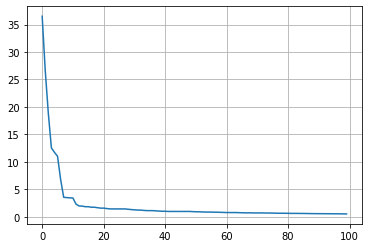

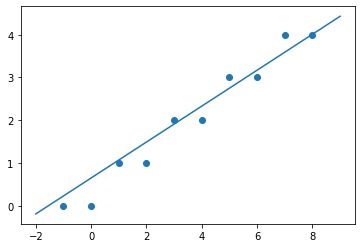

In [40]:
regression(np.array([-1,0,1,2, 3, 4, 5, 6, 7, 8]), np.array([0, 0,1,1, 2, 2, 3, 3, 4, 4]))

In [41]:
# def gen_test(n, k, limit):
#     m = random.rand(n)
#     s = random.rand(n)
